<a href="https://colab.research.google.com/github/dijankarki-herald/Concept-and-technologies-of-AI/blob/main/Worksheet_6_part_I.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

1. Implementing Sigmoid Function:

In [ ]:
def logistic_function(x):
  y= 1/(1+np.exp(-x))
  return y

In [ ]:
def test_logistic_function():
  x_scalar= 0
  expected_output_scalar= round(1 / (1 + np.exp(0)), 3)
  print(expected_output_scalar)
  assert round(logistic_function((x_scalar)),3)== expected_output_scalar ,'test failed for scalar input'

  x_pos= 2
  expected_output_pos = round(1 / (1 + np.exp(-2)), 3) # Expected output: ~0.881
  assert round(logistic_function(x_pos), 3) == expected_output_pos, "Test failed for positive scalarinput"


  x_neg = -3
  expected_output_neg = round(1 / (1 + np.exp(3)), 3) # Expected output: ~0.047
  assert round(logistic_function(x_neg), 3) == expected_output_neg, "Test failed for negative scalar"
  # Test with numpy array input
x_array = np.array([0, 2, -3])
expected_output_array = np.array([0.5, 0.881, 0.047]) # Adjusted expected values rounded to 3 decimals
# Use np.round to round the array element-wise and compare
assert np.all(np.round(logistic_function(x_array), 3) == expected_output_array), "Test failed for"

print("All tests passed!")
test_logistic_function()

All tests passed!
0.5


2. Implementing Log Loss Function:

In [ ]:
def log_loss(y_true, y_pred):
  y_pred = np.clip(y_pred, 1e-10, 1 - 1e-10)
  # print(y_pred)
  loss= -(y_true*np.log(y_pred)+ (1-y_true)*np.log(1-y_pred))
  return loss

In [ ]:
def test_log_loss():
  y_true= 1
  y_pred= 1
  expected_loss= 0.0
  assert np.isclose(log_loss(y_true, y_pred), expected_loss),"test failed for y_true= 1 and y_pred= 1 "
  print("sucessfull 1")

  y_true= 0
  y_pred= 0
  expected_loss= 0.0
  assert np.isclose(log_loss(y_true, y_pred), expected_loss),"test failed for y_true= 0 and y_pred= 0 "
  print("sucessfull 2")


  y_true = 1
  y_pred = 0

  try:
    log_loss(y_true, y_pred) # This should raise an error due to log(0)
  except ValueError:
    pass # Test passed if ValueError is raised for log(0)

# Test case 4: Incorrect prediction (y_true = 0, y_pred = 1)
  y_true = 0
  y_pred = 1
  try:
    log_loss(y_true, y_pred) # This should raise an error due to log(0)
  except ValueError:
    pass # Test passed if ValueError is raised for log(0)
  y_true = 1
  y_pred = 0.8
  expected_loss = -(1 * np.log(0.8)) - (0 * np.log(0.2)) # ~0.2231
  assert np.isclose(log_loss(y_true, y_pred), expected_loss, atol=1e-6), "Test failed for partiallycorrect prediction (y_true=1, y_pred=0.8)"
  y_true = 0
  y_pred = 0.2
  expected_loss = -(0 * np.log(0.2)) - (1 * np.log(0.8)) # ~0.2231
  assert np.isclose(log_loss(y_true, y_pred), expected_loss, atol=1e-6), "Test failed for partiallycorrect prediction (y_true=0, y_pred=0.2)"
  print("All test passed")

test_log_loss()

sucessfull 1
sucessfull 2
All test passed


3. Implementing Cost Function:

In [ ]:
def cost_function(y_true, y_pred):
  assert len(y_true)==len(y_pred),"length of value and predicted must be equal"
  n= len(y_true)
  loss_vec=log_loss(y_true, y_pred)
  cost= np.sum(loss_vec)/ n
  return cost


# testing the cost function
def test_cost_function():
  y_true=np.array([1,0,1])
  y_pred= np.array([0.9,0.1,0.8])

  expected_cost = (-(1 * np.log(0.9)) - (1 - 1) * np.log(1 - 0.9) +
  -(0 * np.log(0.1)) - (1 - 0) * np.log(1 - 0.1) +
  -(1 * np.log(0.8)) - (1 - 1) * np.log(1 - 0.8)) / 3

  result= cost_function(y_true,y_pred)
  # print(result,'result is ')
  # print(expected_cost,'expected_cost is ')
  #if the difference between this two output is less than or equal to 1e-0 then it is considerable
  assert np.isclose(result, expected_cost, atol=1e-6), f"Test failed: {result} != {expected_cost}"
  print("Test passed for simple case!")
test_cost_function()


Test passed for simple case!


4. Extending the cost function for sigmoid regression to be used with model parameters.

formula: yˆ = σ x · w T + b = 1/ 1 + e −(x·wT +b)

ycap= σ(z)= 1/1+e**(x*W.T)

In [ ]:
def costfunction_logreg(X,Y,W,B):
  # print(X.shape,"X")
  # print(Y.shape,"Y")
  # print(W.shape,"W")
  # n= rows
  # d= columns
  n,d= X.shape
  # print('n',n)
  # print('d',d)

  assert len(Y)==n,"Number of feature observations and number of target observations do not match."
  assert len(W) == d, "Number of features and number of weight parameters do not match."
  Z= np.dot(X,W)+B
  y_pred= 1/(1+np.exp(-Z))
  cost= cost_function(Y,y_pred)
  return cost

X=np.array([[10, 20], [-10, 10]])
Y=np.array([1, 0])
W=np.array([0.5, 1.5])
B=1
print(f"the cost function is {costfunction_logreg(X,Y,W,B):.4f}")
print(X)


the cost function is 5.5000
[[ 10  20]
 [-10  10]]


5. Implementing Gradient Descent for Training Sigmoid Regression:

TODO 5

In [ ]:
def compute_gradient(X,Y,W,B):
  # print(X.shape,"X")
  # print(Y.shape,"Y")

  # print(W.shape,"W")

  n,d= X.shape
  M= len(Y)
  assert len(Y)==n ,"y and n dont have equal length means label are not equal according to row "
  assert len(W)==d,"w and d dont have equal length means weight is not equal to all columns"
  Z= np.dot(X,W)+B
  y_pred= 1/(1+np.exp(-Z))
  error= y_pred -Y
  dot_product= np.dot(X.T ,error)
  grad_W= np.sum(dot_product)/M
  grad_B= (np.sum(error))/M
  return grad_W, grad_B




X = np.array([[10, 20], [-10, 10]]) # shape (2, 2)
Y = np.array([1, 0]) # shape (2,)
W = np.array([0.5, 1.5]) # shape (2,)
B = 1 # scalar

try:
  grad_w, grad_b = compute_gradient(X, Y,W, B)
  print("Gradients computed successfully.")
  print(f"grad_w: {grad_w}")
  print(f"grad_b: {grad_b}")
except AssertionError as e:
  print(f"Assertion error: {e}")


Gradients computed successfully.
grad_w: -2.6645352591003757e-15
grad_b: 0.4999916492890759


6. Task To Do:

In [ ]:
def gradient_descent(X,Y,W,B,alpha,n_iter, show_cost=False, show_params=False):
  n,d= X.shape
  assert len(Y)==n ,"y and n dont have equal length means label are not equal according to row "
  assert len(W)==d,"w and d dont have equal length means weight is not equal to all columns"
  cost_history= []
  params_history= []
  w_update= W.copy()
  i_values= []

  for i in range(n_iter):
    i_values.append(i)
    Z= (np.dot(X, w_update) + B)
    y_pred = 1 / (1 + np.exp(-Z))

    grad_w,grad_b= compute_gradient(X,Y,w_update,B)
    w_update= w_update- alpha * grad_w
    B= B- alpha *grad_b
    cost= cost_function(Y, y_pred)
    cost_history.append(cost)
    params_history.append((w_update.copy(),B))
  # if show_cost and (i % 100 == 0 or i == n_iter - 1):
  #   print(f"Iteration {i}: Cost = {cost:.6f}")
  # if show_params and (i % 100 == 0 or i == n_iter - 1):
  #   print(f"Iteration {i}: w = {w_update}, b = {b_update:.6f}")


  return w_update, B , cost_history,params_history,i_values

x = np.array([[0.1, 0.2], [-0.1, 0.1]])
y = np.array([1, 0])
w = np.zeros(x.shape[1])
print(w)
b= 0.0
alpha= 0.5
n_iter= 100000

w_update, b_update , cost_history,params_history,i_values= gradient_descent(x,y,w,b,alpha,n_iter)
print("\nFinal parameters:")
print(f"w: {w_update}, b: {b_update}")
print(f"Final cost: {cost_history[-1]:.6f}")

[0. 0.]

Final parameters:
w: [46.65395256 46.65395256], b: -6.976063889649588
Final cost: 0.000913


In [ ]:
#testig for gradient descent
def test_gradient_descent():
  x= np.array([[0.1, 0.2], [-0.1, 0.1]])
  y = np.array([1, 0])
  w= np.zeros(x.shape[1])
  print(w)
  b=0.0
  alpha = 0.5
  n_itr=  100000
  w_out, b_out, cost_history,params_history,i_values= gradient_descent(x,y,w,b,alpha,n_itr,show_cost=False,show_params=False)

  assert len(cost_history) == n_itr, "Cost history length does not match the number of iterations"
  assert w_out.shape == w.shape, "Shape of output weights does not match the initial weights"
  assert isinstance(b_out, float), "Bias output is not a float"
  assert cost_history[-1] < cost_history[0], "Cost did not decrease over iterations"
  print(f'final cost function is {cost_history[-1]}')
  print(f'second last  cost function is {cost_history[-2]}')
  print(f"difference in cost function {cost_history[-2]- cost_history[-1]:.4f}")
  print("All tests passed!")
test_gradient_descent()

[0. 0.]
final cost function is 0.000913436046007451
second last  cost function is 0.0009134452178200447
difference in cost function 0.0000
All tests passed!


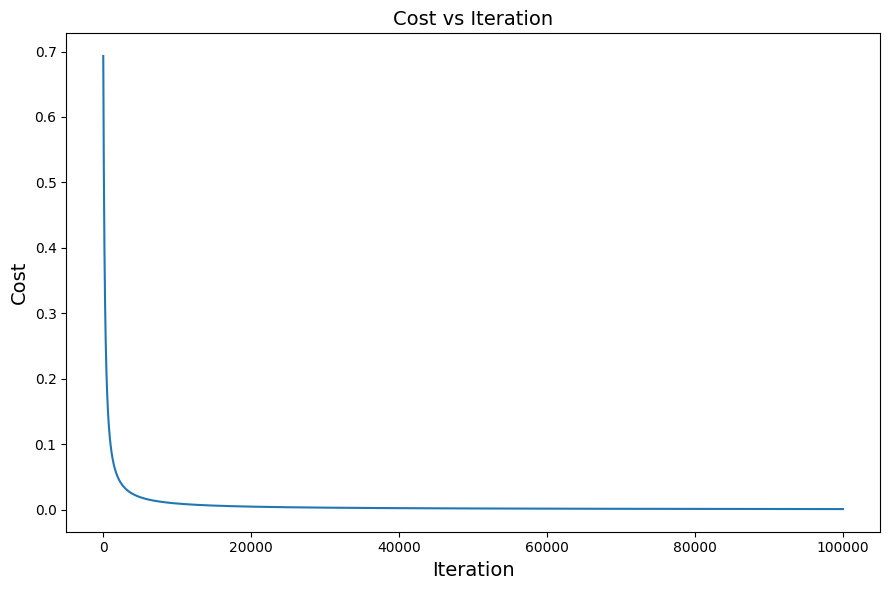

In [ ]:
plt.figure(figsize = (9, 6))
plt.plot(cost_history)
plt.xlabel("Iteration", fontsize = 14)
plt.ylabel("Cost", fontsize = 14)
plt.title("Cost vs Iteration", fontsize = 14)
plt.tight_layout()
plt.show()

6. Decision/Prediction Function for Binary Classification:
our threshold is 0.5 yˆ = ( 1 if yprob ≥ τ, 0 if yprob < τ. )

In [ ]:
def prediction(X,W,B,threshold=0.5):
  Z= np.dot(X,W)+B
  print(Z)
  print(X)
  y_test_prob= 1/(1+np.exp(-Z))
  y_pred = (y_test_prob >= threshold).astype(int)
  # as type(int) gives the true or false if true it is 1 and if false then 0

  return y_pred


def test_predicition():
  X_test = np.array([[0.5, 1.0], [1.5, -0.5], [-0.5, -1.0]]) # Shape (3, 2)
  w_test = np.array([1.0, -1.0]) # Shape (2,)
  b_test = 0.0 # Scalar bias
  threshold= 0.5
  expected_output = np.array([0, 1, 1])
  y_pred = prediction(X_test, w_test, b_test, threshold)
  print("prediction is ",y_pred)
  assert np.array_equal(y_pred, expected_output), f"Expected {expected_output}, but got {y_pred}"

  print("test passed")
test_predicition()


[-0.5  2.   0.5]
[[ 0.5  1. ]
 [ 1.5 -0.5]
 [-0.5 -1. ]]
prediction is  [0 1 1]
test passed


Evaluating Classifier

In [ ]:
def evaluate_classification(y_true, y_pred):
  TP = np.sum((y_true == 1) & (y_pred == 1)) # True Positives
  TN = np.sum((y_true == 0) & (y_pred == 0))
  FP = np.sum((y_true == 0) & (y_pred == 1))
  FN = np.sum((y_true == 1) & (y_pred == 0))
# Confusion matrix
  confusion_matrix = np.array([[TN, FP],[FN, TP]])
  precision = TP / (TP + FP) if (TP + FP) > 0.0 else 0.0
  recall = TP / (TP + FN) if (TP + FN) > 0.0 else 0.0
  f1_score = (2*recall*precision)/(recall+precision)
# Metrics dictionary
  metrics = {
  "confusion_matrix": confusion_matrix,
  "precision": precision,
  "recall": recall,
  "f1_score": f1_score
  }
  return metrics
y_true=np.array([1,0,1])
y_pred= np.array([1,1,0])
print(evaluate_classification(y_true, y_pred))

{'confusion_matrix': array([[0, 1],
       [1, 1]]), 'precision': np.float64(0.5), 'recall': np.float64(0.5), 'f1_score': np.float64(0.5)}


- Some Basic Data Operation, Loading, Analysis and Cleaning:

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
url = "/content/drive/MyDrive/diabetes_.csv"
columns = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"]
data_pima_diabetes = pd.read_csv(url, header=0)

columns_to_clean = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

data_pima_diabetes[columns_to_clean] = data_pima_diabetes[columns_to_clean].replace(0, np.nan)

data_pima_diabetes[columns_to_clean] = data_pima_diabetes[columns_to_clean].apply(pd.to_numeric, errors='coerce')

data_pima_diabetes[columns_to_clean] = data_pima_diabetes[columns_to_clean].fillna(
    data_pima_diabetes[columns_to_clean].median()
)

data_pima_diabetes.info()
data_pima_diabetes.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,29.108073,140.671875,32.455208,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,8.791221,86.383060,6.875177,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


- Train Test Split and Standard Scaling of the Data:

In [ ]:
X= data_pima_diabetes.drop(columns=['Outcome']).values
Y= data_pima_diabetes['Outcome'].values
X_train,X_test, Y_train,Y_test= train_test_split(X,Y)
print("X_train",X_train.shape)
print("X_test",X_test.shape)
print("Y_train",Y_train.shape)
print("Y_test",Y_test.shape)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
print(X_train_scaled.shape)
X_test_scaled = scaler.transform(X_test)

X_train (576, 8)
X_test (192, 8)
Y_train (576,)
Y_test (192,)
(576, 8)


- Training of the Sigmoid Regression:


Training Logistic Regression Model:


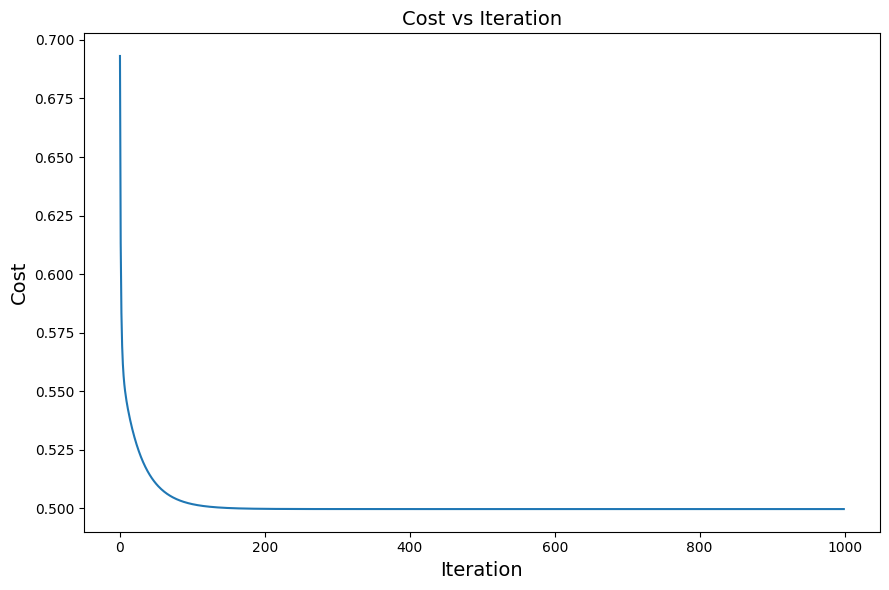

In [ ]:
w = np.zeros(X_train_scaled.shape[1])
b = 0.0
alpha = 0.1
n_iter = 1000
print("\nTraining Logistic Regression Model:")
w, b, cost_history,params_history,i_values = gradient_descent(X_train_scaled, Y_train, w, b, alpha, n_iter,show_cost=True, show_params=False)
# Plot cost history
plt.figure(figsize=(9, 6))
plt.plot(cost_history)
plt.xlabel("Iteration", fontsize=14)
plt.ylabel("Cost", fontsize=14)
plt.title("Cost vs Iteration", fontsize=14)
plt.tight_layout()
plt.show()

- did model overfit or underfit

In [ ]:
y_train_pred= prediction(X_train_scaled,w,b,threshold=0.5)
y_test_pred= prediction(X_test_scaled,w,b,threshold=0.5)
train_cost= costfunction_logreg (X_train_scaled, Y_train, w,b)
test_cost= costfunction_logreg (X_test_scaled, Y_test, w,b)
print(f"\nTrain Loss (Cost): {train_cost:.4f}")
print(f"Test Loss (Cost): {test_cost:.4f}")

[-4.99887237e-02 -2.71835182e+00 -4.22040747e+00 -1.98365687e+00
 -2.00437788e+00 -3.12821724e+00  1.63309386e-01 -1.52626425e-01
 -1.51425908e+00 -9.75929801e-01 -3.27688457e-01  7.72264329e-01
 -9.04791142e-01  3.38524261e-01 -2.40268133e+00  1.86426621e-01
 -4.93660311e-01 -1.39372188e+00  1.33495599e+00 -8.39128500e-02
 -1.68591118e+00 -2.93581322e+00 -6.42629921e-01 -6.51999513e-01
 -2.82892963e+00 -2.81952434e+00  8.74774371e-01 -2.54286753e-01
  8.02540922e-01 -8.00305617e-01  2.50012646e+00 -1.00431397e+00
 -1.53030511e+00  1.21091453e+00  8.22382252e-01 -5.04709701e-01
 -4.92907252e-01 -7.39807258e-01 -8.27534662e-01 -1.81348383e+00
 -8.89192760e-01 -3.48298329e+00 -2.42183636e+00 -2.10955269e+00
  6.61157473e-01  4.51304324e-02 -8.24440189e-01 -3.20083693e+00
 -1.91693620e+00 -8.80567893e-01 -2.25409384e+00  2.69757003e-01
 -3.06374759e+00 -2.86185923e-01 -1.74312450e+00 -1.07246181e+00
 -1.51959332e+00 -5.56154092e-01 -2.30010261e+00 -2.97083329e+00
 -7.68165089e-01 -2.39971

- how well my model did


Test Accuracy: 66.15%

Confusion Matrix:
[[97 24]
 [41 30]]
Precision: 0.5555555555555556
Recall: 0.4225352112676056
F1-Score: 0.48


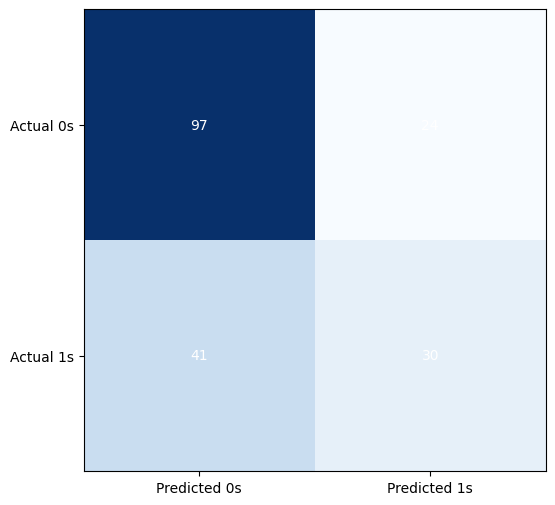

In [ ]:
# Accuracy
test_accuracy = np.mean(y_test_pred == Y_test) * 100
print(f"\nTest Accuracy: {test_accuracy:.2f}%")

# Confusion matrix and metrics
cm = confusion_matrix(Y_test, y_test_pred)
precision = precision_score(Y_test, y_test_pred)
recall = recall_score(Y_test, y_test_pred)
f1 = f1_score(Y_test, y_test_pred)

print(f"\nConfusion Matrix:\n{cm}")
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

# Visualization
fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(cm, cmap="Blues")   # <-- numeric array now
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=("Predicted 0s", "Predicted 1s"))
ax.yaxis.set(ticks=(0, 1), ticklabels=("Actual 0s", "Actual 1s"))
ax.set_ylim(1.5, -0.5)

for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha="center", va="center", color="white")

plt.show()